# Explore HLS composite metadata

In [1]:
!pip install plotnine

In [88]:
import sys
import os

import geopandas as gpd
import pandas as pd

#sys.path.append('/projects/icesat2_boreal/lib')
sys.path.append('/projects/code/icesat2_boreal/lib')
import ExtractUtils

import datetime


import json
import glob

import s3fs
import numpy as np
s3 = s3fs.S3FileSystem(anon=False)

In [2]:
from mosaiclib import *

In [58]:
from plotnine import *

### Build a df of the metadata for the HLS composites

In [139]:
YEAR = '2020'

In [140]:
HLS_MOSAIC_JSON_FN_DICT[YEAR]

's3://maap-ops-workspace/shared/montesano/DPS_tile_lists/HLS/HLS_stack_2023_v1/HLS_H30_2020/HLS_tindex_master_mosaic.json'

#### HLS composite metadata shows various run types and counts for any yearly composite

In [171]:
YEAR_LIST = ['2016','2017','2018','2019','2020','2021','2022','2023']

## Tile-level metadata

Producing cloud-free composites for a short growing season is a challenge. HLS pre- and post-2021

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 33'. Pick better value with 'binwidth'.


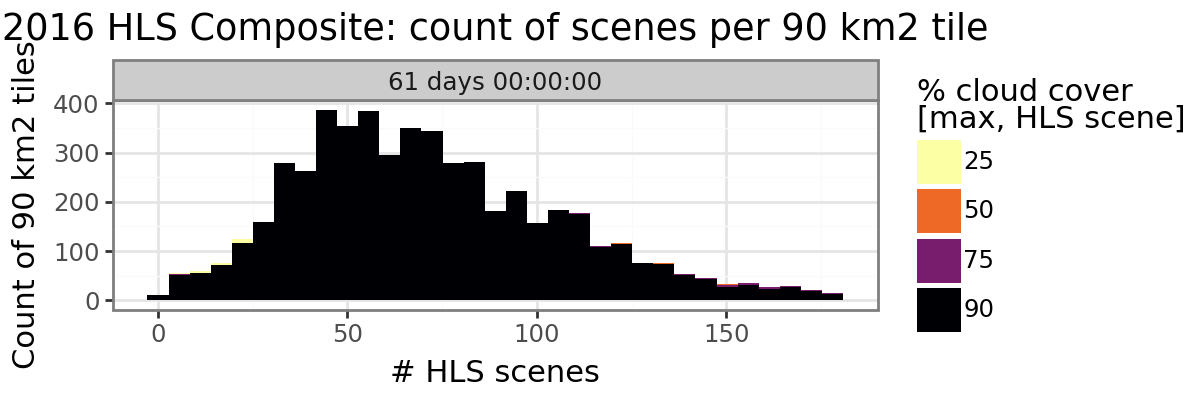

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


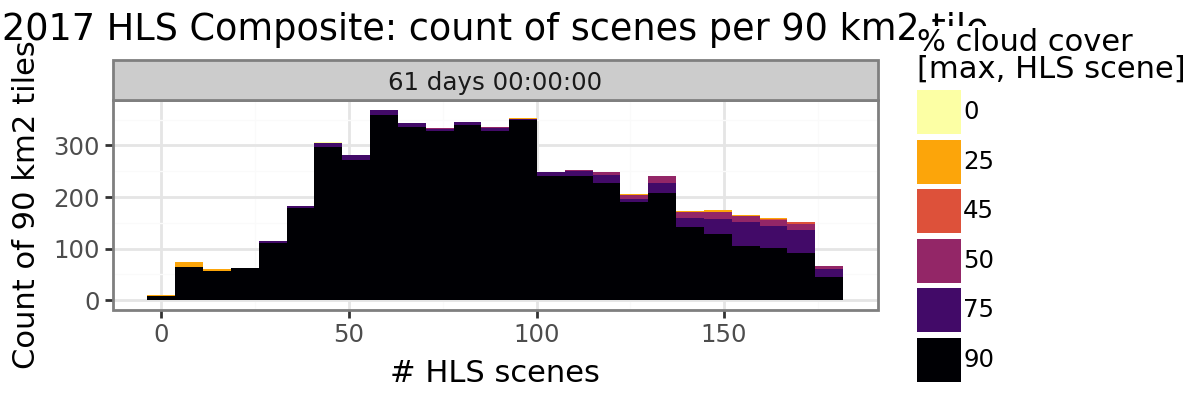

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.


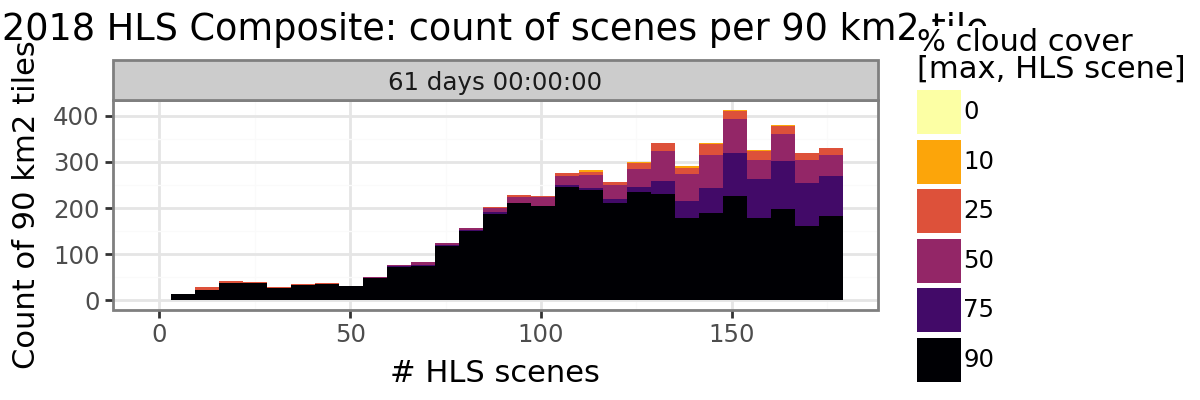

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.


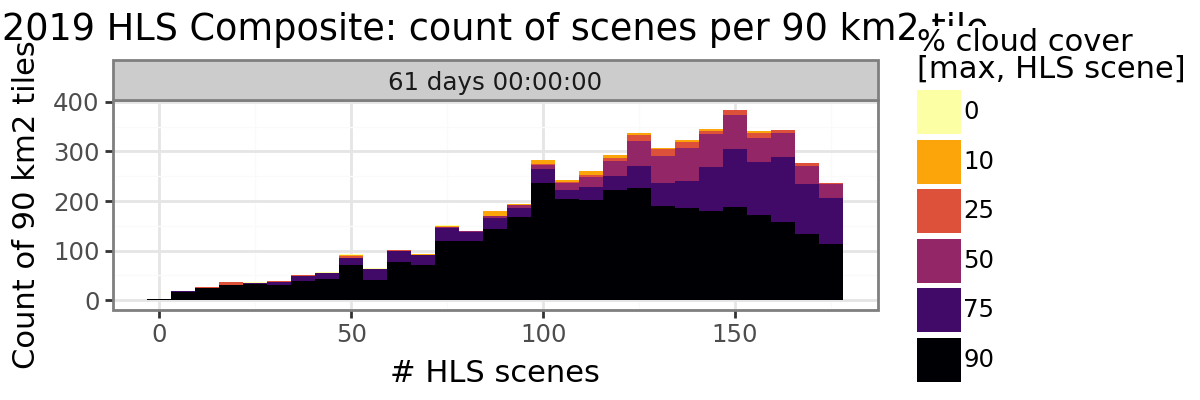

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 40'. Pick better value with 'binwidth'.


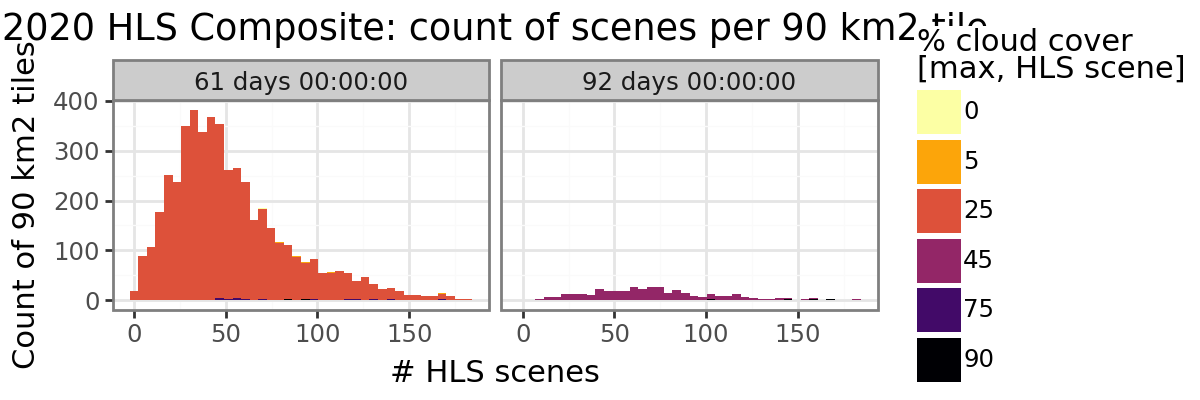

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.


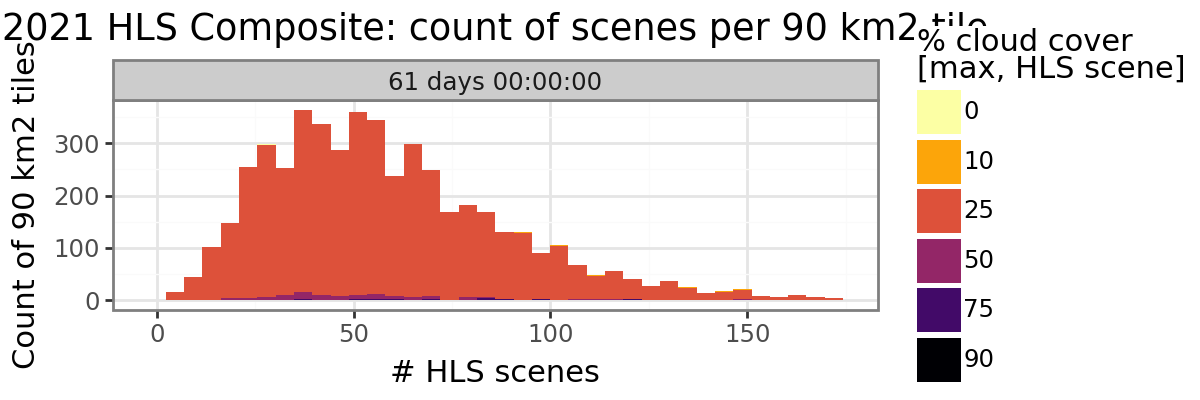

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


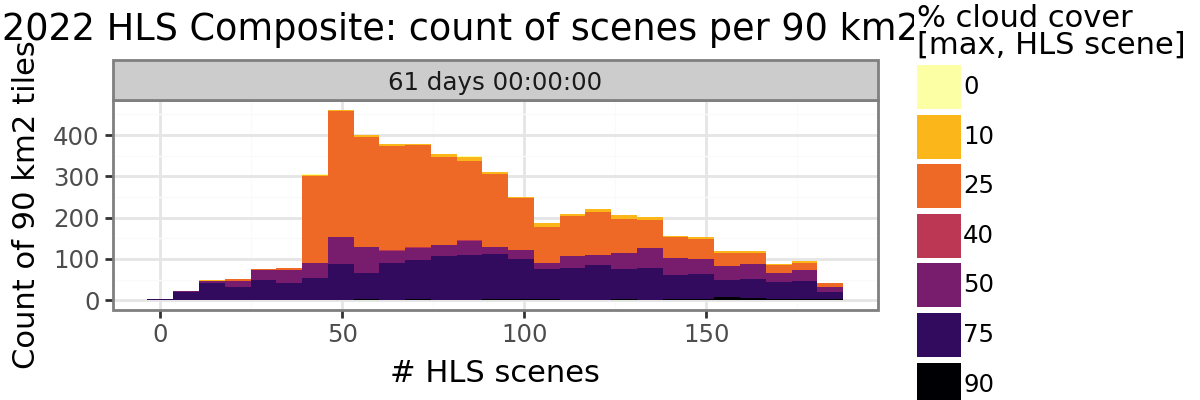

/tmp/ipykernel_6061/2023966919.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/conda/envs/pangeo/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 32'. Pick better value with 'binwidth'.


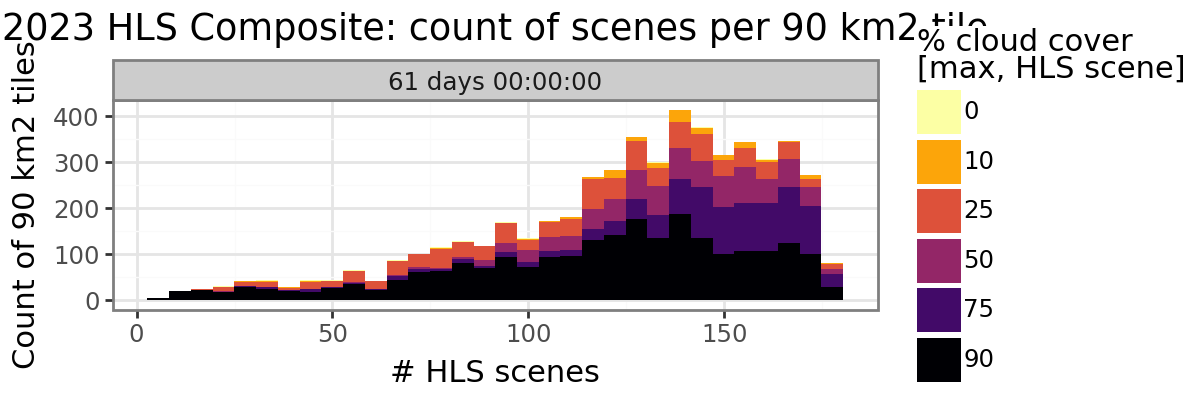

In [172]:
for YEAR in YEAR_LIST:
    
    hls_input_params = pd.read_csv(HLS_MOSAIC_JSON_FN_DICT[YEAR].replace('tindex_master_mosaic.json', 'input_params.csv'))
    hls_input_params['temporal_window'] = (pd.to_datetime(hls_input_params.end_month_day, format='%m-%d') - pd.to_datetime(hls_input_params.start_month_day, format='%m-%d'))/ np.timedelta64(1, 'D').astype(int)
    p = (
        ggplot(data = hls_input_params)
        + geom_histogram(aes(x='num_scenes', fill="factor(max_cloud)"), position='stack')
        + scale_fill_cmap_d(cmap_name ='inferno_r', name='% cloud cover\n[max, HLS scene]')
        #+ facet_grid('~end')
        + theme_bw()
        + theme(figure_size=(6, 2))
        + labs(title=f'{YEAR} HLS Composite: count of scenes per 90 km2 tile', x='# HLS scenes', y='Count of 90 km2 tiles')
        + facet_grid('~temporal_window')

    )
    print(p)

### For most of the tiles, a 25% cc threshold across a temporal window of 61 days (July-Aug). For most of the remaining tiles compositing artifacts forced us to broaden the temporal window and increase the cloudcover threshold to produce continuous composites. 

In [35]:
hls_input_params.groupby('run_type').agg({'run_type':['count']})

,run_type
,count
run_type,
0_07-01_08-31_2020_2020,2
25_07-01_08-31_2020_2020,4822
45_06-15_09-15_2020_2020,370
5_07-01_08-31_2020_2020,7
75_07-01_08-31_2020_2020,31
90_06-15_09-15_2020_2020,18
90_07-01_08-31_2020_2020,12


In [3]:
hls_tindex = pd.read_csv(HLS_MOSAIC_JSON_FN_DICT[YEAR].replace('_mosaic.json', '.csv'))

In [4]:
len(hls_tindex)

5262

In [5]:
hls_tindex.tail()

,index,s3_path,local_path,file,tile_num,creation time
5257,5257,s3://maap-ops-workspace/montesano/dps_output/d...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_4219_07-01_08-31_2020_2020.tif,4219,2023-10-19 08:34:58
5258,5258,s3://maap-ops-workspace/montesano/dps_output/d...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_3163_07-01_08-31_2020_2020.tif,3163,2023-10-19 08:34:53
5259,5259,s3://maap-ops-workspace/montesano/dps_output/d...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_3529_07-01_08-31_2020_2020.tif,3529,2023-10-19 08:34:33
5260,5260,s3://maap-ops-workspace/montesano/dps_output/d...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_4122_07-01_08-31_2020_2020.tif,4122,2023-10-19 08:34:32
5261,5261,s3://maap-ops-workspace/montesano/dps_output/d...,/projects/my-private-bucket/dps_output/do_HLS_...,HLS_3160_07-01_08-31_2020_2020.tif,3160,2023-10-19 08:34:32


In [27]:
#MAINDIR_STR = f'/projects/my-private-bucket/dps_output/do_HLS_stack_3-1-2/HLS_stack_2023_v1/HLS_H30_{YEAR}/**'
MAINDIR_STR_S3 = f's3://maap-ops-workspace/montesano/dps_output/do_HLS_stack_3-1-2/HLS_stack_2023_v1/HLS_H30_{YEAR}/**'

In [30]:
#hls_json_meta_list = [glob.glob(os.path.join(os.path.dirname(hls_tindex.local_path.to_list()[i]), f'master_{hls_tindex.tile_num[i]}_*_HLS.json')) for i in range(len(hls_tindex))]
#hls_json_meta_list = glob.glob(f"{MAINDIR_STR}/master_*_HLS.json", recursive=True)
hls_json_meta_list = [f.replace('maap-ops-workspace/montesano','/projects/my-private-bucket') for f in s3.glob(f"{MAINDIR_STR_S3}/master_*_HLS.json")]
hls_json_meta_list[0]

'/projects/my-private-bucket/dps_output/do_HLS_stack_3-1-2/HLS_stack_2023_v1/HLS_H30_2020/2023/04/10/18/37/24/844638/master_207_2020-07-01_2020-08-31_HLS.json'

In [31]:
%%time

gdf_list = []
df_list = []
df_smry_list = []
fn_not_found_list=[]

def season_classifier(row):
    if '01' in row["start_month"]:
        return "wet"
    else:
        return "dry"

for fn in hls_json_meta_list:
    
    # Cant make gdf and df during one single open...
    try:
        with open(fn) as f:

            # Build geodataframes
            gdf = gpd.GeoDataFrame.from_features(json.load(f), crs=4326)
            gdf_list.append(gdf)

        with open(fn) as f:

            # Build dataframe of attributes
            df = pd.json_normalize(json.load(f), record_path=['features'])
            #df['datetime'] = pd.to_datetime(df.id.str.split('.', expand=True)[3], format='%Y%jT%H%M%S')
            #df['doy'] = df['datetime'].dt.dayofyear
            df['filename'] = os.path.basename(fn)
            df['start'] = os.path.basename(fn).split('_')[2]
            df['start_month'] = os.path.basename(fn).split('_')[2].split('-')[1]
            df['year'] = os.path.basename(fn).split('_')[2].split('-')[0]
            df['season'] = 'none'
            if False:
                df['season'] = df.apply(season_classifier, axis=1)
            df['end'] = os.path.basename(fn).split('_')[3]
            df_smry = df.groupby(['filename','year','season']).size().reset_index(name='counts')
            df_list.append(df)
            df_smry_list.append(df_smry)
    except:
        print(f'File not found: {fn}')
        fn_not_found_list.append(fn)

df = pd.concat(df_list)
df_smry = pd.concat(df_smry_list)
df_smry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5740 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5740 non-null   object
 1   year      5740 non-null   object
 2   season    5740 non-null   object
 3   counts    5740 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 224.2+ KB
CPU times: user 2min 57s, sys: 6.43 s, total: 3min 4s
Wall time: 9min 44s


### Geodataframe show all the pieces of HLS scenes used for all tiles
duplicate HLS scenes indicate where scenes were used for multiple tiles

In [48]:
%%time
hls_scene_part_gdf = pd.concat([pd.concat(gdf_list), pd.concat(df_list)], axis=1)
hls_scene_part_gdf.drop( [c for c in hls_scene_part_gdf.columns for s in ['assets','links','properties'] if s in c], axis=1, inplace=True)

CPU times: user 10.2 s, sys: 388 ms, total: 10.6 s
Wall time: 10.6 s


In [50]:
hls_scene_part_gdf.shape

(296852, 19)

In [49]:
hls_scene_part_gdf.groupby('id').agg({'id':['count']}).shape

(64330, 1)

In [51]:
hls_scene_gdf = hls_scene_part_gdf.dissolve(by='id')

In [153]:
hls_scene_gdf['datetime'] = pd.to_datetime(hls_scene_gdf['datetime'])
hls_scene_gdf['doy'] = pd.to_datetime(hls_scene_gdf['datetime']).dt.dayofyear

In [154]:
hls_scene_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 64330 entries, HLS.L30.T01VCK.2020208T232307.v2.0 to HLS.S30.T60WWV.2020209T000621.v2.0
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   geometry              64330 non-null  geometry           
 1   eo:cloud_cover        64330 non-null  int64              
 2   datetime              64330 non-null  datetime64[ns, UTC]
 3   start_datetime        64330 non-null  object             
 4   end_datetime          64330 non-null  object             
 5   type                  64330 non-null  object             
 6   stac_version          64330 non-null  object             
 7   stac_extensions       64330 non-null  object             
 8   collection            64330 non-null  object             
 9   bbox                  64330 non-null  object             
 10  geometry.type         64330 non-null  object             
 11  ge

<Axes: >

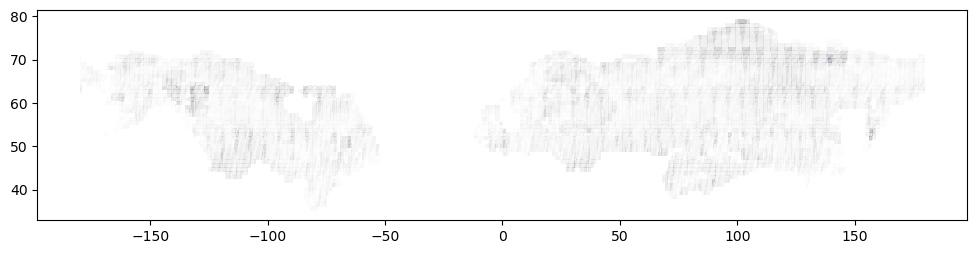

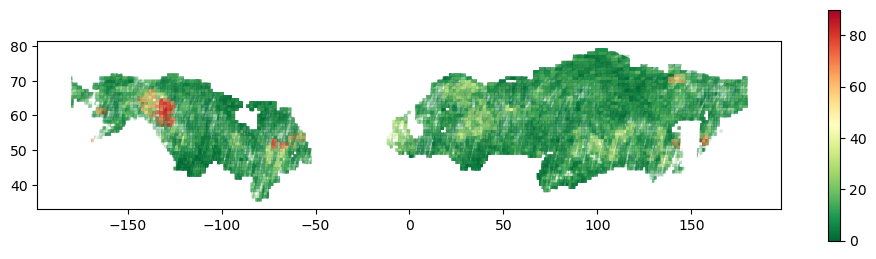

In [46]:
hls_scene_gdf.plot(alpha=0.005, legend=True, figsize=(12,3))
hls_scene_gdf.plot(column='eo:cloud_cover', alpha=0.25, cmap='RdYlGn_r', legend=True, figsize=(12,3))

In [16]:
# hls_json_meta_list = ['s3://'+f for f in s3.glob('s3://maap-ops-workspace/montesano/dps_output/do_HLS_stack_3-1-2/HLS_stack_2023_v1/mc*/**/master_*HLS.json')]
# hls_json_meta_list = ['s3://'+f for f in s3.glob('s3://maap-ops-workspace/nathanmthomas/dps_output/do_HLS_stack_3-1-2_ubuntu/HLS_stack_2023_v1/HLS_H30*/**/master_*HLS.json')]
# hls_json_meta_list[0]

In [6]:
import plotnine
from plotnine import *

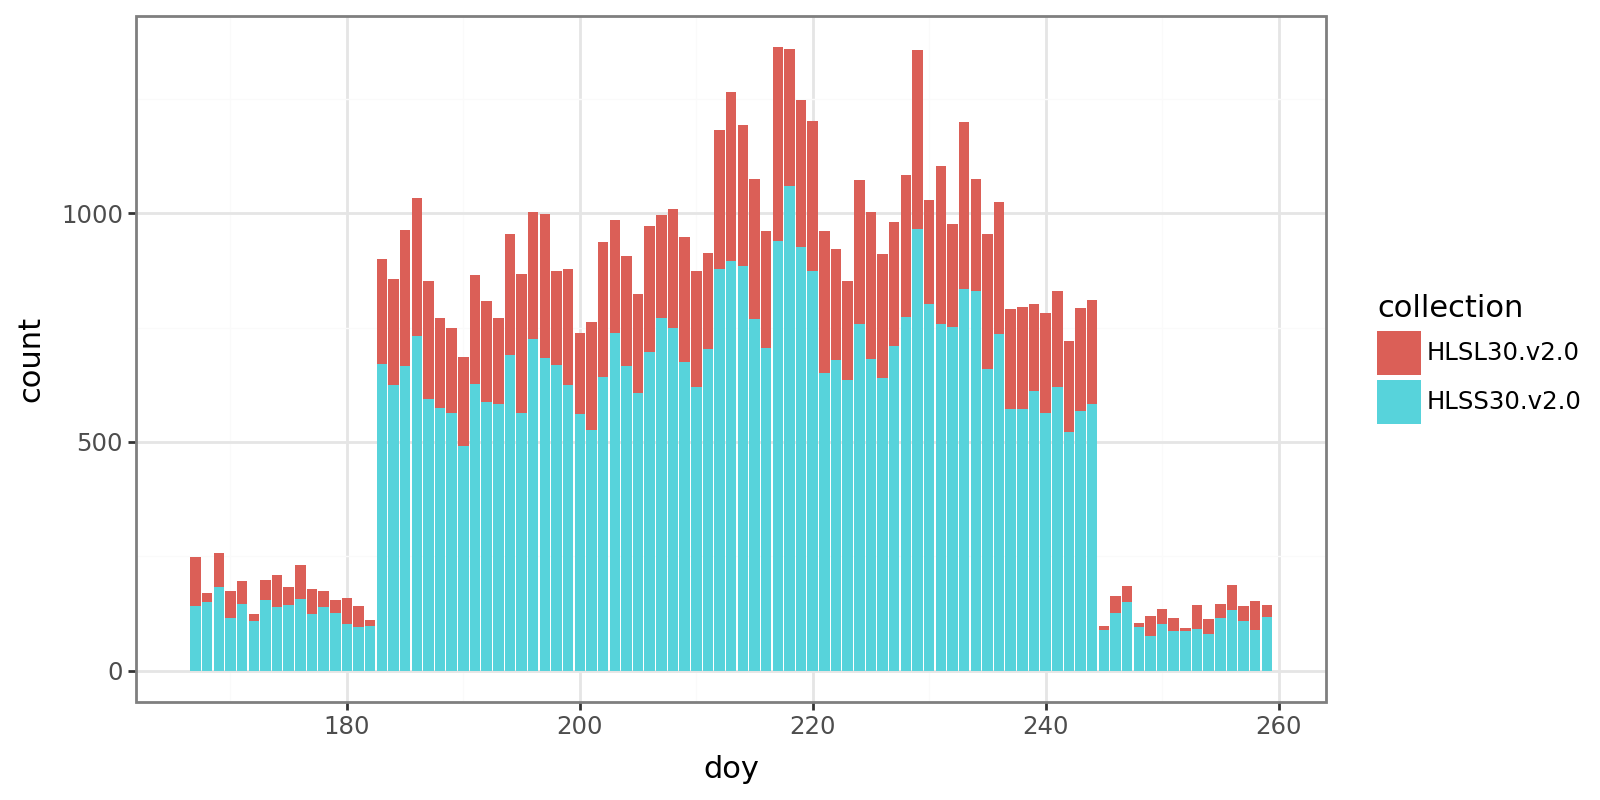

In [156]:
var = 'properties.eo:cloud_cover'
(
    ggplot(data = hls_scene_gdf)
    #+ geom_point(aes(x='start', y=var))
    + geom_bar(aes(x='doy', fill='collection'))
    #+ facet_grid('~end')
    + theme_bw()
    + theme(figure_size=(8, 4)) 
    )